In [1]:
import Bio
from Bio import Entrez
Entrez.email = 'kathe102@hhu.de'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Completedata.csv')

In [3]:
'''
WP_Nums: 
XcsA: WP_011242471
BcsA1: WP_011378340
BcsA2: WP_011243364

'''
dfXcsA = df[df["qseqid"] =='WP_011242471']
dfBcsA1 = df[df['qseqid']== 'WP_011378340']
dfBcsA2 = df[df['qseqid']== 'WP_011243364']

In [4]:
def get_infos (dataframe):
    result_record=[]
    query_sequences=list(dataframe['sacc'].unique())
    end = len(query_sequences)
    begin = 0
    step = 500
    steps = 500
    while begin < end:
        if step >= end:
            step = end
        print("\t {} to {}".format(begin,step))
        splitted_ids = query_sequences[begin:step]
        for attempt in range(10):
            try:
                handle = Entrez.efetch(id=splitted_ids, db="protein", retmode="xml")
                record = Entrez.read(handle)
                handle.close()
            except Exception as e:
                print("attempt : {} queries : {}".format(attempt,query))
                if attempt == 9:
                    raise Exception
            else:
                for rec in record:
                    result_record.append(rec)
                print("result record length : {}".format(len(result_record)))
                break
        begin += steps
        step += steps
    
    return(result_record)

In [5]:
def get_lenghtdict (result_list):
    lengths = {}
    for i in range(len(result_list)):
        lengths[result_list[i]['GBSeq_locus']] = int(result_list[i]['GBSeq_length'])
    print('Number of entries:',len(lengths))
    return(lengths)

In [6]:
XcsAinf = get_infos(dfXcsA)
lengthsXcsA = get_lenghtdict(XcsAinf)
BcsA1inf = get_infos(dfBcsA1)
lengthsBcsA1 = get_lenghtdict(BcsA1inf)
BcsA2inf = get_infos(dfBcsA2)
lengthsBcsA2 = get_lenghtdict(BcsA2inf)

	 0 to 285
result record length : 285
Number of entries: 285
	 0 to 500
result record length : 500
	 500 to 1000
result record length : 1000
	 1000 to 1500
result record length : 1500
	 1500 to 2000
result record length : 2000
	 2000 to 2500
result record length : 2500
	 2500 to 3000
result record length : 3000
	 3000 to 3327
result record length : 3327
Number of entries: 3327
	 0 to 404
result record length : 404
Number of entries: 404


In [7]:
lenprotXcsA =  list(lengthsXcsA.values())
lenprotBcsA1 =  list(lengthsBcsA1.values())
lenprotBcsA2 =  list(lengthsBcsA2.values())

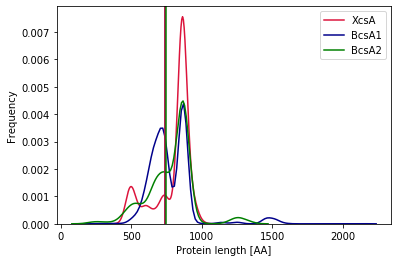

In [8]:
graph = sns.kdeplot(lenprotXcsA, color="crimson", label="XcsA", shade= False)
graph = sns.kdeplot(lenprotBcsA1, color="darkblue", label="BcsA1", shade= False)
graph = sns.kdeplot(lenprotBcsA2, color="green", label="BcsA2", shade= False)
graph.axvline(lengthsBcsA1['WP_011378340'], color='darkblue')
graph.axvline(lengthsXcsA['WP_011242471'], color ='crimson')
graph.axvline(lengthsBcsA2['WP_011243364'], color='green')
#plt.legend().set_visible(False)
plt.xlabel('Protein length [AA]')
plt.ylabel('Frequency')
plt.savefig('length_A.pdf')
plt.show()


In [7]:
## why is the frequency for all proteins the highest at ~ 900 aa? 

XcsA =list(dfXcsA.sacc)
BcsA1 = list(dfBcsA1.sacc)
BcsA2 = list(dfBcsA2.sacc)

In [12]:
set(BcsA1) & set(BcsA2)

set()